In [2]:
'''
Here based one the example tensorflow neural nets of linear regression.
We will do the same example once again to be perfect.


'''
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Lets create inputs and outputs

In [3]:
#Lets create x labels and add some noise to it to get some random uniform data
x_label=np.linspace(1,10,10) + np.random.uniform(-1.5,1.5,10)

In [4]:
#Now lets get the y labels
y_label=np.linspace(1,10,10) + np.random.uniform(-1.5,1.5,10)

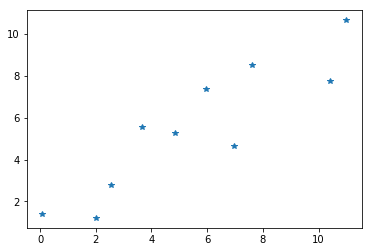

In [5]:
#Lets plot the values
plt.plot(x_label,y_label,'*')

#### Lets create Variables
##### We will assign some random value for the weights and bias

In [6]:
np.random.rand(2)

array([0.60152656, 0.45709634])

In [7]:
m=tf.Variable(0.60)
b=tf.Variable(0.52)

## Now we have to plot the linear regression which is y=mx+b
#### Which on this result we will calculate the error or cost function and we will try to reduce
#### using Gradien descent function.

In [8]:
#now lets calculate the error
for x,y in zip(x_label,y_label):
    #We will calculate the y value using the formula.
    y_cal=m*x_label+b
    
    #Now lets calculate the cost function
    error=(y_label-y_cal)**2

#### Now lets create gradient descent function and pass the values to minimize the error


In [9]:
gradient=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=gradient.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Now we have error value, we have x,y,y_calvalues lets run the session
##### Before running we have to initialise the global variable initialiser to run the variables.

In [10]:
init=tf.global_variables_initializer()

In [11]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    #Lets train the model
    training_rate=5
    for i in range(training_rate):
        sess.run(train)
        
        #After running calculate take the fresh m and b values
        final_slope,final_intercept=sess.run([m,b])
    

In [12]:
#lets check the m and b values
final_slope,final_intercept

(0.8675661, 0.5727518)

##### So now we have got the slope and intercept of thevalues. now lets plot the line using this variables.

In [13]:
y_res=final_slope*x_label+final_intercept

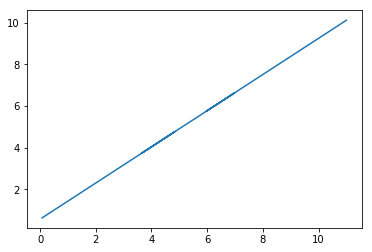

In [14]:
# Now lets plot it
plt.plot(x_label,y_res)

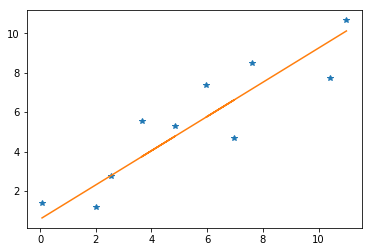

In [15]:
#Now lets plot both
plt.plot(x_label,y_label,'*')
plt.plot(x_label,y_res)

#### If you see above the result looks nice.

### Now lets run for some more training sets and check will it become better.

In [16]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    training_rate=100
    for i in range(training_rate):
        sess.run(train)
        final_slope,final_intercept=sess.run([m,b])

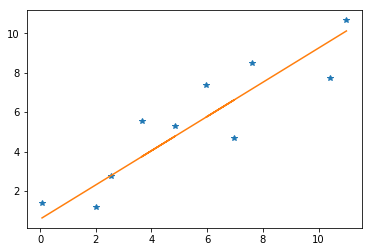

In [17]:
#Now lets plot both
plt.plot(x_label,y_label,'*')
plt.plot(x_label,y_res)

### Its almost the same


In [18]:
#lets check the m and b values
final_slope,final_intercept

(0.83457977, 0.8221795)

In [19]:
##Lets run for more values
x_label=np.linspace(1,10,60)+np.random.uniform(-1.5,1.5,60)
y_label=np.linspace(1,10,60)+np.random.uniform(-1.5,1.5,60)

#### Now lets test the slope with these values

In [20]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    training_rate=100
    for i in range(training_rate):
        sess.run(train)
        
    final_slope,final_intercept=sess.run([m,b])

In [21]:
y_res=final_slope*x_label+final_intercept

In [22]:
y_res.shape

(60,)

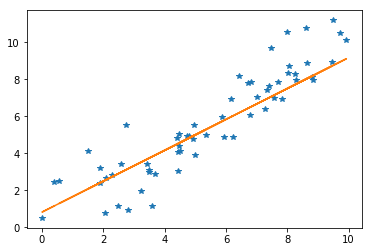

In [23]:
plt.plot(x_label,y_label,'*')
plt.plot(x_label,y_res,)

## Till now we have created Variables. Now we will create place holders and we will pass input values

### This process is slightly different from above example
#### in the above example we created new data out of training values.
#### But here we will validate whether the values are correct or not by training.

### Lets create new data for this process. But bigger data

In [24]:
x_data=np.linspace(1.0,10.0,1000000)


### We will create y_data by calculating with slope intercept formula. y=mx+b

In [25]:
# For that lets assign some values to m and b
m=0.4
b=8

In [26]:
#Lets calcuate the y_data
y_data=m*x_data+b+np.random.uniform(-1.5,1.5,1000000)

In [27]:
y_data.shape

(1000000,)

#### We will crate a data frame using pandas and we will joing x and y

In [28]:
import pandas as pd

In [29]:
x_df=pd.DataFrame(x_data,columns=['x_data'])
y_df=pd.DataFrame(y_data,columns=['y_data'])

In [30]:
df_data=pd.concat([x_df,y_df],axis=1)

In [31]:
df_data.shape

(1000000, 2)

In [32]:
df_data.tail()

,x_data,y_data
999995,9.999964,10.607119
999996,9.999973,11.994831
999997,9.999982,11.649407
999998,9.999991,11.910825
999999,10.000000,12.190145


### now we will plot those values.
#### As there are about 1 million values in the data frame, We will take some samples and project it in the graph.


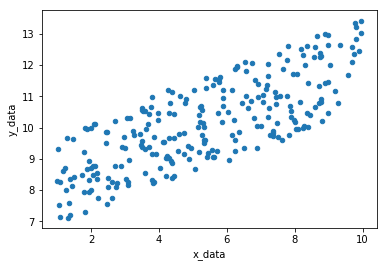

In [33]:
df_data.sample(250).plot(kind='scatter',x='x_data',y='y_data')

### So now we have x_data and y_data. We will train these two values with random weights and check in the end whether these two weights and biase are matching or not.

##### Batch size is used in the training proces. like when to update the model.
##### If the size is 10. Then for every 10 values the weights and biases will get updated.

In [34]:
#Now lets create  batch size

batch_size=10

In [35]:
## Lets create some random values and assign to m and b
np.random.rand(2)

array([0.20818842, 0.49132877])

In [36]:
m=tf.Variable(0.13)
b=tf.Variable(0.07)

In [37]:
#Lets create a place holder with size equalt to batch size
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [40]:
xph

<tf.Tensor 'Placeholder:0' shape=(10,) dtype=float32>

#### Place holders will hold the values of given size if the size is given in prameters.

In [41]:
### So in this case the place holder will hold values 
#now lets calculate the mx+b
y_cal=m*xph+b

#### Using reduce dimensions w can reduce the dimension of the tensor input.
##### Like if axis=0 then we will add all the values taking no dimensional. If axis=1 then we will add the values which are in 1st dimension etc.,

In [43]:
##Lets create errror using tensorflow objects.
error=tf.reduce_sum(tf.square(yph-y_cal))

##### Now lets call gradien descent

In [ ]:
gradient=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=gradient.minimize(error)

In [81]:
init=tf.global_variables_initializer()

In [83]:
#now lets run the session
with tf.compat.v1.Session() as sess:
    sess.run(init)
    # We cannot run all the data as it is very huge. so we choose batch of 10000
    batch=10000
    for i in range(batch):
        #Now we will get the random points with the lenght of x_data so that we will feed that training
        #So we the data will be trained on random data set instead of a seriel data.
        random_int=np.random.randint(len(x_data),size=batch_size)
        #Now we will take the feed dictionary values.
        feed={xph:x_data[random_int],yph:y_data[random_int]}
        
        #Lets train the model
        sess.run(train,feed_dict=feed)
        
        #lets pick the values
        model_m,model_b=sess.run([m,b])

#### Now lets compare the actual slope and intercept versus the final one.
### Previously it was m=0.4, b=8


In [85]:
## yess We made it. 
model_m,model_b

(0.32748467, 8.005086)

# *************** The END *******************